In [19]:
from models.XGB.xgb_model import XGBModel

import os
import pandas as pd

ROOT_PATH = os.path.pardir
SUNSPOTS_PATH = os.path.join(ROOT_PATH, "datasets/Sunspots.csv")
MACKEY_GLASS_PATH = os.path.join(ROOT_PATH, "datasets/MackeyGlass.csv")
ELECTRICITY_PATH = os.path.join(ROOT_PATH, "datasets/Electricity.csv")

# XGB Model
## 100/30 Model definition
We define a model that will predict 30 steps ahead based on 100 steps behind.

In [21]:
MyXGB_100_30 = XGBModel(
    dataset=pd.read_csv(ELECTRICITY_PATH),
    n_steps_in=20,
    n_steps_out=5,
    test_frac=0.1,
    metric=None,
)

Target column: 'IPG2211A2N'


## Fit model to data

In [22]:
MyXGB_100_30.fit()

## Get forecasts
### with autoregression as well!

In [23]:
# Autoregressive forecast, as far as test dataset
forecast_autoregressive = MyXGB_100_30.predict(-1, autoreggressive=True)

# Windowed forecast with shift, 25 ahead
forecast = MyXGB_100_30.predict(10, autoreggressive=False, shift=0)

## Plot forecasts

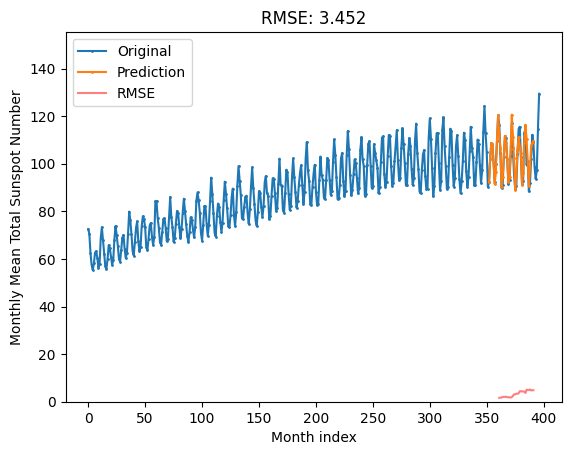

In [25]:
# Autoregressive forecast
MyXGB_100_30.plotter.plot_forecast(forecast_autoregressive, linestyle='-')

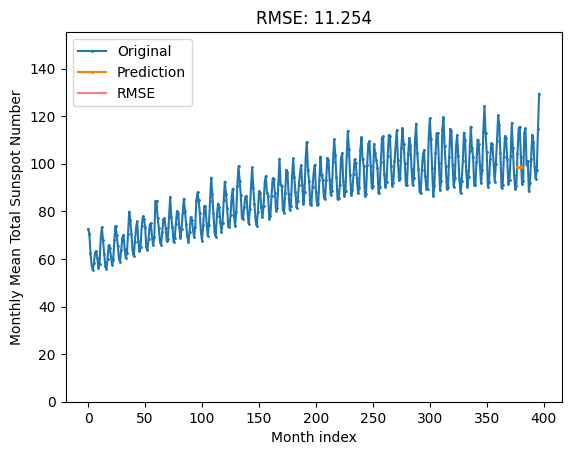

In [26]:
# Windowed forecast
MyXGB_100_30.plotter.plot_forecast(forecast, linestyle='-')

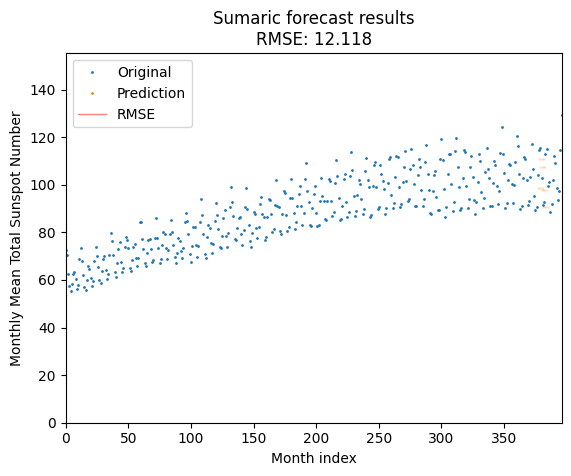

In [29]:
# Cumulative plot for windowed forecast
MyXGB_100_30.plotter.plot_forecasts(MyXGB_100_30.forecasts, linestyle='')

## 50/1 Model definition
We define a model that will predict a single steps ahead based on 50 steps behind.

In [32]:
MyXGB_50_1 = XGBModel(
    dataset=pd.read_csv(ELECTRICITY_PATH),
    n_steps_in=20,
    n_steps_out=1,
    test_frac=0.1,
    metric=None,
)

Target column: 'IPG2211A2N'


In [33]:
# Fit to data
MyXGB_50_1.fit()

In [34]:
# Autoregressive forecast, as far as test dataset
forecast_autoregressive = MyXGB_50_1.predict(-1, autoreggressive=True)

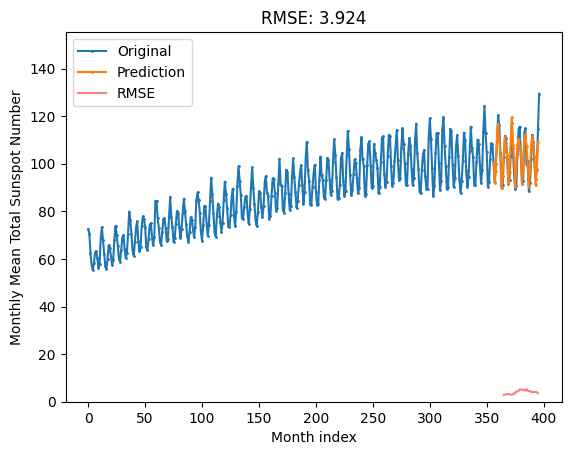

In [36]:
# Autoregressive forecast
MyXGB_50_1.plotter.plot_forecast(forecast_autoregressive, linestyle='-')